# Description

The goal of this BONUS part of the Sream recommendation engine pet project is to show how reviews data can by analysed in order to derive some key entities to understand players perception of the games. 

Extracting information about brand reputation, especially associated with certain buisness descisions or track of competent solutions, which is useful for:
1. Game developers/publishers optimising their buisness descisions, marketing
2. Retailers planning stocks/estimating sales for products by certain developers/publishers
3. Individual customers to better identifying untrustworthy game developers/publishers, or, on the contrary, solidifying trust/loyalty to specific game developers/publishers

Here we will build sentiment analysis, build sentiment classifiers, extract key features and build some world clouds.

Importing the libs and reading the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import spacy

In [6]:
data = pd.read_csv("steam_reviews.csv")

In [7]:
data.describe()

,funny,helpful,hour_played
count,4.348910e+05,434891.000000,434891.000000
mean,5.333024e+05,1.004114,364.130773
std,4.785640e+07,59.462935,545.961198
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,62.000000
50%,0.000000e+00,0.000000,190.000000
75%,0.000000e+00,0.000000,450.000000
max,4.294967e+09,28171.000000,31962.000000


In [8]:
data.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


## EDA

In [9]:
data['review_length'] = data.apply(lambda row: len(str(row['review'])), axis=1)

data['recommendation_int'] = data['recommendation'] == 'Recommended'
data['recommendation_int'] = data['recommendation_int'].astype(int)

In [10]:
len(data['title'].unique()), data['title'].unique()

(48,
 array(['Expansion - Hearts of Iron IV: Man the Guns', 'Dead by Daylight',
        'Wargroove', 'Wallpaper Engine', 'Factorio',
        'Insurgency: Sandstorm', 'Cold Waters', 'Tannenberg',
        'Pathfinder: Kingmaker', 'MONSTER HUNTER: WORLD',
        'Divinity: Original Sin 2 - Definitive Edition',
        'Football Manager 2019', "Garry's Mod", 'Survivor Pass: Vikendi',
        'Moonlighter', 'Terraria', 'GOD EATER 3',
        'Sid Meier’s Civilization® VI', 'Rocket League®',
        'Subnautica: Below Zero', "Tom Clancy's Rainbow Six® Siege",
        'ASTRONEER', 'Sid Meier’s Civilization® VI: Rise and Fall',
        'Kenshi', 'Euro Truck Simulator 2', 'Grand Theft Auto V',
        'RimWorld', 'NBA 2K19', 'RESIDENT EVIL 2 / BIOHAZARD RE:2',
        'Slay the Spire', 'My Time At Portia', 'Foundation', 'Beat Saber',
        "Sid Meier's Civilization® VI: Gathering Storm", 'Stardew Valley',
        'Farming Simulator 19', "PLAYERUNKNOWN'S BATTLEGROUNDS",
        'Overcooked! 2

The data set contains only a subsamole of reviews, for 48 games

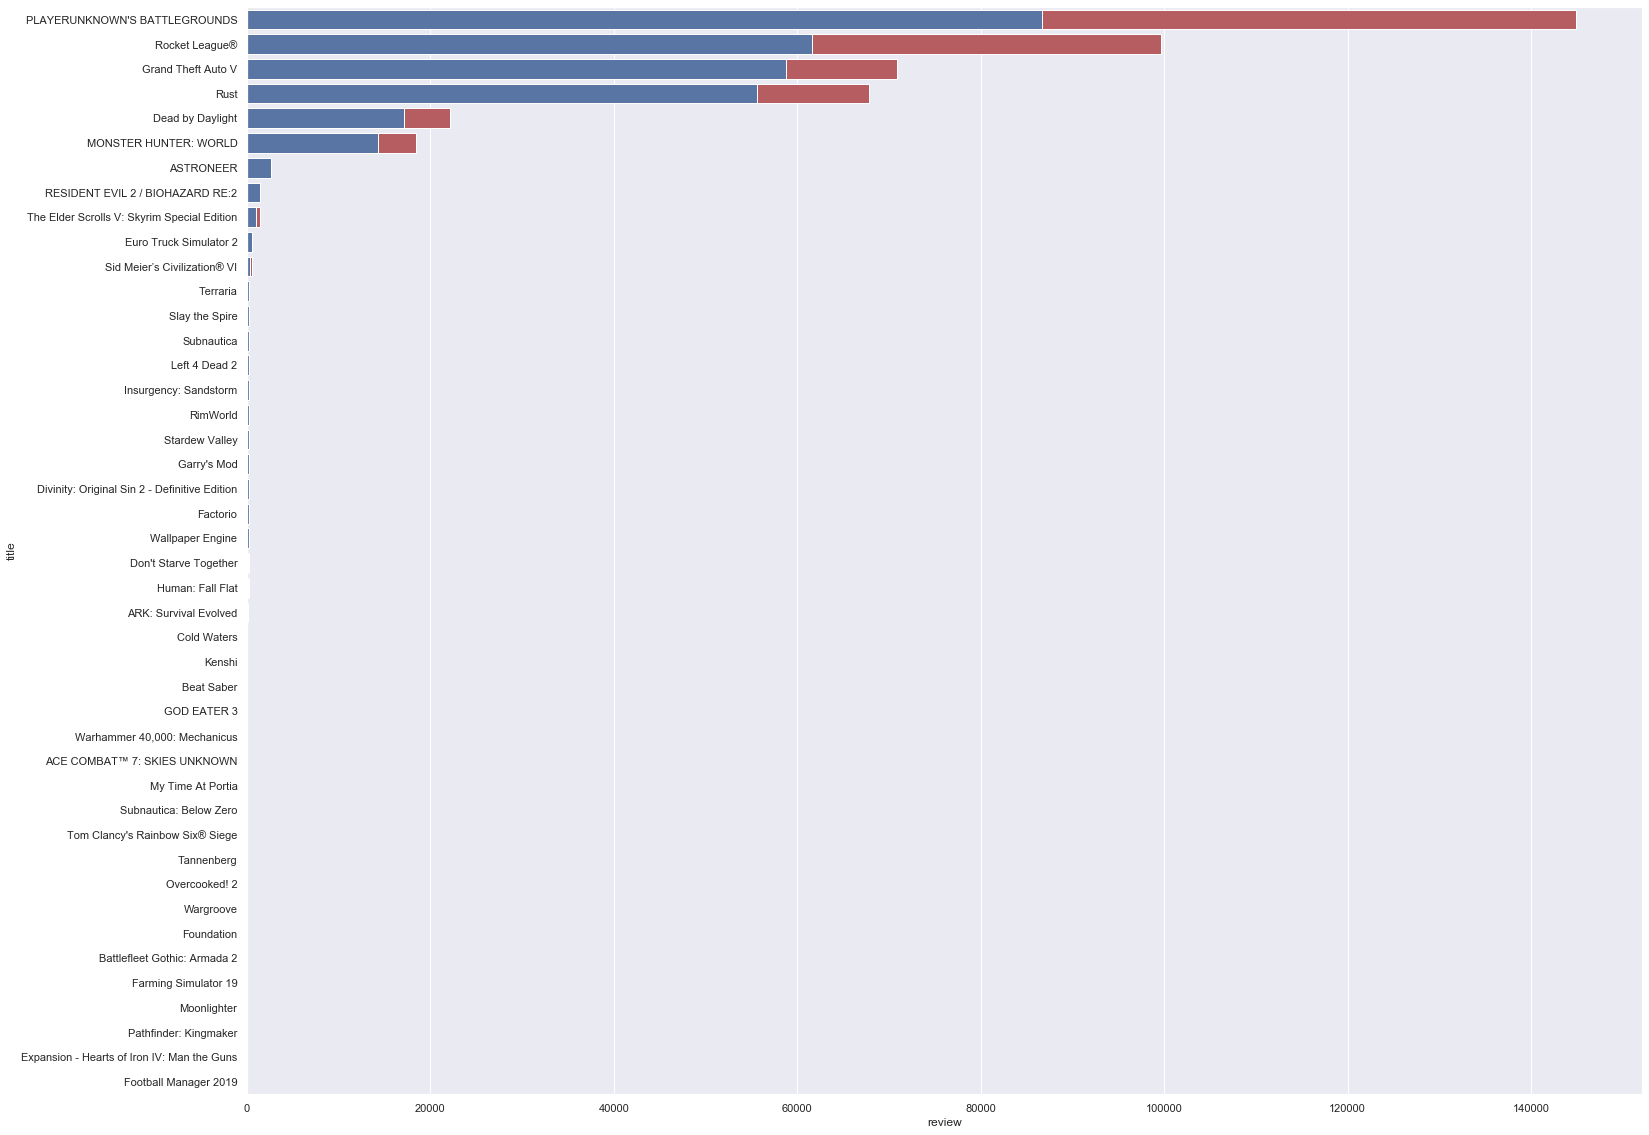

In [11]:
reviews_count = data.groupby(['title'])['review'].count().sort_values(ascending=False)

reviews_count = reviews_count.reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(25,20))
sns.barplot(y=reviews_count['title'], x=reviews_count['review'], data=reviews_count,
            label="Total", color="r")

reviews_count_pos = data.groupby(['title', 'recommendation_int'])['review'].count().sort_values(ascending=False)
reviews_count_pos = reviews_count_pos.reset_index()
reviews_count_pos = reviews_count_pos[reviews_count_pos['recommendation_int'] == 1]
sns.barplot(y=reviews_count_pos['title'], x=reviews_count_pos['review'], data=reviews_count_pos,
            label="Total", color="b")

Out of which only around 11 games have significant number of reviews

In [38]:
data.groupby(['title', 'recommendation_int'])['review'].count()
data[data['title'] == "Sid Meier’s Civilization® VI"]

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review_length,recommendation_int
41921,2016-11-23,0,0,25,False,Recommended,ONE MORE TURN BUT THIS TIME THERE'S A SIX INST...,Sid Meier’s Civilization® VI,75,1
41922,2016-10-21,0,0,28,False,Recommended,It's simply... Gorgeous a masterpiece.,Sid Meier’s Civilization® VI,38,1
41923,2016-11-23,1,1,178,False,Recommended,They did it again. Civ V was great (with some ...,Sid Meier’s Civilization® VI,232,1
41924,2018-04-23,57,2937,58,False,Not Recommended,Forced to uninstall due to the updated EULA wh...,Sid Meier’s Civilization® VI,833,0
41925,2016-11-24,0,0,1234,False,Recommended,The new districts civics and revamped wonder s...,Sid Meier’s Civilization® VI,338,1
...,...,...,...,...,...,...,...,...,...,...
42438,2017-10-14,0,0,146,False,Not Recommended,Has some nice refinements but no real innovati...,Sid Meier’s Civilization® VI,222,0
42439,2017-10-16,0,0,433,False,Recommended,I like this game I really do. I would recommen...,Sid Meier’s Civilization® VI,321,1
42440,2017-03-02,0,0,802,False,Recommended,Fun Civ game I like the new 'districts' mechan...,Sid Meier’s Civilization® VI,199,1
42441,2017-03-04,0,0,654,False,Recommended,32 hours in within a week damn this is the bes...,Sid Meier’s Civilization® VI,147,1


Let's the distribution of positive and negative reviews, as well as heloful and not helpful (Spoiler alert - imbalanced)

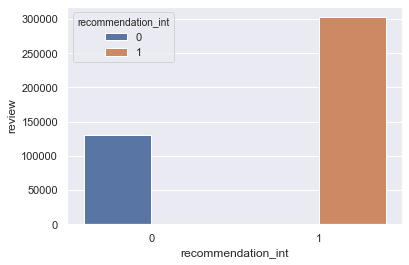

In [39]:
polarity_count = data.groupby(['recommendation_int']).count()
polarity_count = polarity_count.reset_index()


ax = sns.barplot(x=polarity_count['recommendation_int'], y=polarity_count['review'],
            data=polarity_count, hue='recommendation_int')

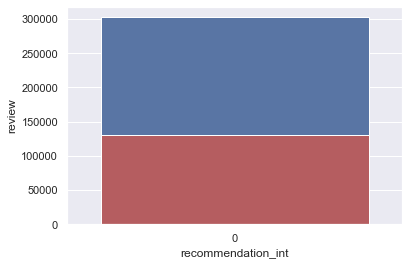

In [40]:
polarity_count_pos = polarity_count[polarity_count['recommendation_int'] == 1]
sns.barplot(x=polarity_count_pos['recommendation_int'], y=polarity_count_pos['review'], data=polarity_count_pos,
            label="Total", color="b")

polarity_count_neg = polarity_count[polarity_count['recommendation_int'] == 0]
sns.barplot(x=polarity_count_neg['recommendation_int'], y=polarity_count_neg['review'], data=polarity_count_neg,
            label="Total", color="r")

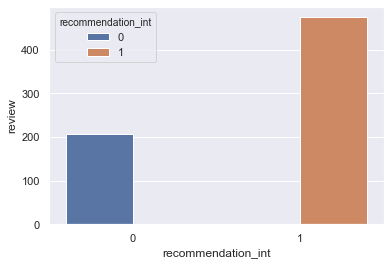

In [41]:
polarity_count = data[data['helpful'] > 50].groupby(['recommendation_int']).count()
polarity_count = polarity_count.reset_index()


ax = sns.barplot(x=polarity_count['recommendation_int'], y=polarity_count['review'],
            data=polarity_count, hue='recommendation_int')

In [42]:
data.isnull().sum()

date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
review_length                0
recommendation_int           0
dtype: int64

## Reviews classifier

In [43]:
import en_core_web_sm

In [44]:
import spacy

# load spacy language model
en_nlp = en_core_web_sm.load()
spacy_tokenizer = en_nlp.tokenizer

# create a custom tokenizer using the spaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

We will use **spacy** for language processing and work with **Civilization VI** as an example title

In [47]:
clean_data = data.dropna()

#train = clean_data
train = clean_data[clean_data['title'] == 'Sid Meier’s Civilization® VI']


X = train['review']
y = train['recommendation_int']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=273, stratify=y)

Let's build basic LogistcRegression classifier

In [48]:
from time import time

#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer

#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


# Zoo of vectorizers inside a pipline, some include comments
t0 = time()
text_clf = Pipeline([#('vect', CountVectorizer(min_df=5)),
                     #('vect', TfidfTransformer(norm=None)),
                     ('vect', TfidfVectorizer(max_df=0.99, norm='l2')), #< default, cuts some generic words
                     ('clf', LogisticRegression(solver='saga', fit_intercept=True, class_weight='balanced', C=0.1)) #< reasonable
                     #('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=273, max_iter=5, tol=None)) #< SVM, SGD version, sometimes delivers good results
                    ])
print("preprocessing done in %0.3fs." % (time() - t0))


t0 = time()
text_clf.fit(X_train, y_train)
print("fitting done in %0.3fs." % (time() - t0))

t0 = time()
y_pred = text_clf.predict(X_test)
print("predicting done in %0.3fs." % (time() - t0))
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred)) #, target_names=target_names))

preprocessing done in 0.000s.
fitting done in 0.074s.
predicting done in 0.012s.
              precision    recall  f1-score   support

           0       0.53      0.61      0.57        51
           1       0.80      0.75      0.77       106

    accuracy                           0.70       157
   macro avg       0.67      0.68      0.67       157
weighted avg       0.71      0.70      0.71       157



Not bad for a baseline. Now let's see which features have weight

In [51]:
import eli5

eli5.show_weights(text_clf, vec=text_clf.named_steps["vect"], top=40)

/Users/pavelgolubev/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/pavelgolubev/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight?,Feature
+0.222,10
+0.209,best
+0.204,great
+0.184,good
+0.160,more
+0.107,than
+0.104,civilization
+0.103,<BIAS>
+0.098,addictive
+0.083,very


## Now let's build some world clouds

The model learned quite well which words attribute to positive and negative reviews

### Negative reviews

In [52]:
clean_data = data.dropna()

# Example: here we want to find out why customers who left negative reviews for certain product are not satisfied, 
train = clean_data[(clean_data['title'] == 'Sid Meier’s Civilization® VI') & (clean_data['recommendation_int'] == 0)]

X = train['review']
y = train['recommendation_int']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=273, stratify=y)

In [56]:
from wordcloud import WordCloud, STOPWORDS

def print_top_words(model, feature_names, n_top_words, colormap='viridis'):
    for topic_idx, topic in enumerate(model.components_):
        
        #to print topics' contents as lists of tokens
        #message = "Topic #%d: " % topic_idx
        
        message = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        
        #to print topics' contents as lists of tokens
        #print(message + '\n')
        
        generate_wordcloud(message, colormap)
    print()    


def generate_wordcloud(text, colormap='viridis'):
    wordcloud = WordCloud(#font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          colormap = colormap
                          #colormap = 'summer', #< suitable for positive reviews
                          #colormap = 'inferno', #< suitable for negative reviews
                          #stopwords = STOPWORDS
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# for testing the generate_wordcloud():
#text = 'all your base are belong to us all of your base base base'
#generate_wordcloud(text)

In [57]:
from sklearn.decomposition import NMF

# Zoo of tested vectorizers:
tfidf_vect = TfidfVectorizer(max_df=.50) #< quick results
#tfidf_vect = TfidfVectorizer(max_df=.50, tokenizer=custom_tokenizer) #< uses spaCy tokenizer w/ lemmatization, good for smaller datasets
#tfidf_vect = TfidfVectorizer(ngram_range=(1, 2)) #< experimental, long to compute, questionable results, but can be insightful

# Transform dataset, extract topics
X_train_topical = tfidf_vect.fit_transform(X_train)

nmf = NMF(n_components=5, random_state=273,
          alpha=.1, l1_ratio=.5)

document_topics_nmf = nmf.fit_transform(X_train_topical)

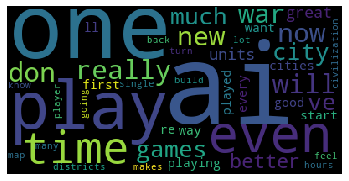

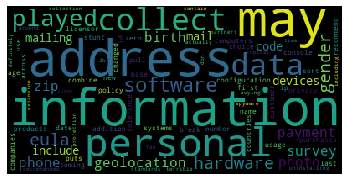

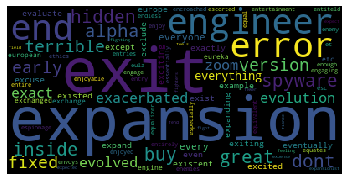

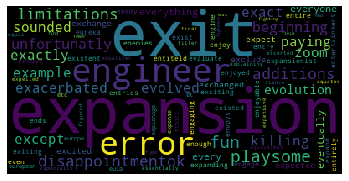

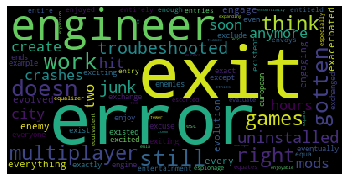

In [58]:
tfidf_vect_feature_names = tfidf_vect.get_feature_names()
print_top_words(nmf, tfidf_vect_feature_names, 100)

Looks like majority of complaints are associated with technical errors, but AI of the game is also not very much praised

### And same for positive reviews

In [59]:
clean_data = data.dropna()

# Example: here we want to find out why customers who left positive reviews for certain product are satisfied, 
train = clean_data[(clean_data['title'] == 'Sid Meier’s Civilization® VI') & (clean_data['recommendation_int'] == 1)]

X = train['review']
y = train['recommendation_int']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=273, stratify=y)

In [60]:
from sklearn.decomposition import LatentDirichletAllocation

vect = CountVectorizer(max_features=10000, max_df=.20)
X_train_topical = vect.fit_transform(X_train)

lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=273)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X_train_topical)

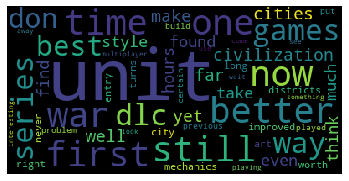

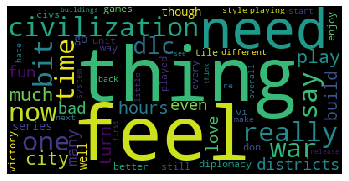

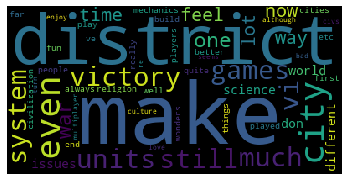

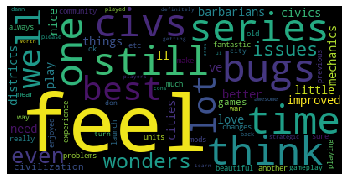

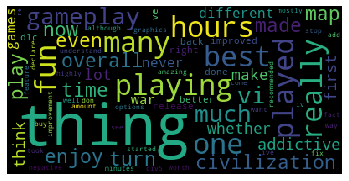

In [61]:
vect_feature_names = vect.get_feature_names()
print_top_words(lda, vect_feature_names, 100)

Here players like how the game feels.

# Conclusion

In this bonus part we have seen how NLP techniques can be used for sentiment analysis in video games reviews.
It is really just a small example, which, however, can be used in multiple roles for both ends of the pipeline - gamers and businesses